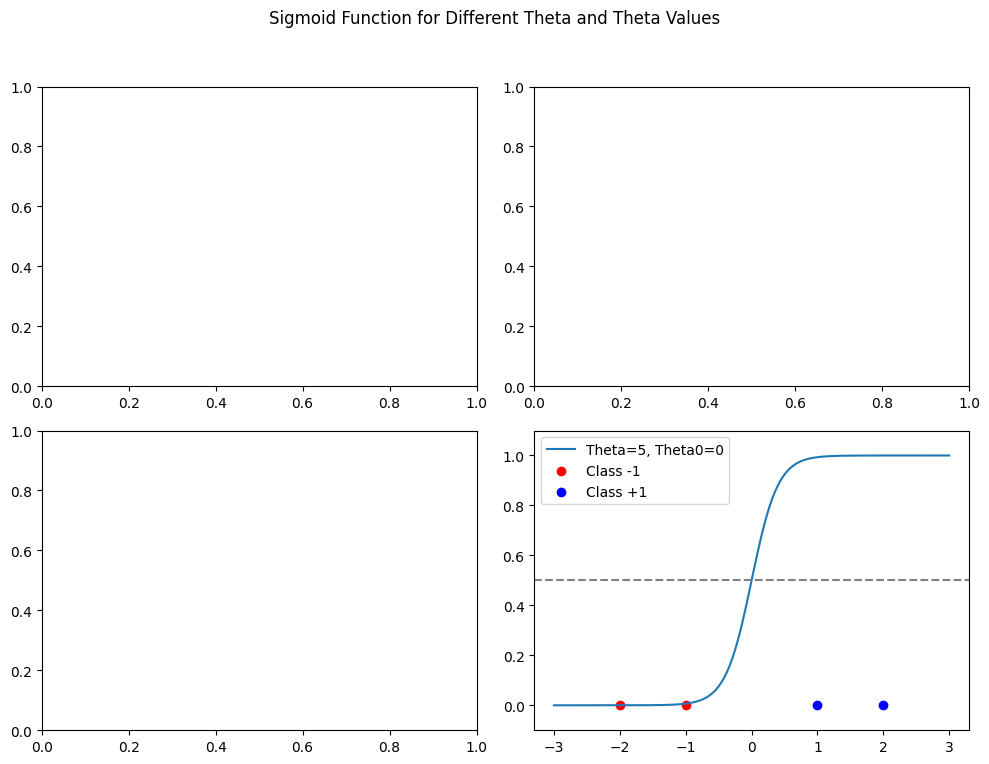

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define points and their classes
x_points = np.array([-2, -1, 1, 2])
y_labels = np.array([0, 0, 1, 1])  # 0 for negative class, 1 for positive class

# Define values for theta and theta0
parameters = [
    (1, 0),     # theta = 1, theta0 = 0
    (-1, 0),    # theta = -1, theta0 = 0
    (0.5, 0),   # theta = 0.5, theta0 = 0
    (5, 0)      # theta = 5, theta0 = 0, likely the correct classifier
]

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, (theta, theta0) in zip(axs.ravel(), parameters):
    # Compute the sigmoid for a range of x values
    x_range = np.linspace(-3, 3, 300)
    z = theta * x_range + theta0
    y = sigmoid(z)

# Plot the sigmoid curve
ax.plot(x_range,y,label=f"Theta={theta}, Theta0={theta0}")
# Plot the points
ax.scatter(x_points[:2], x_points[:2] - x_points[:2], color='red', label='Class -1')
ax.scatter(x_points[2:], x_points[2:] - x_points[2:], color='blue', label='Class +1')

# Formatting the plot
ax.axhline(y=0.5, color='gray', linestyle='--')
ax.set_ylim(-0.1, 1.1)
ax.legend()

# Set overall figure title
fig.suptitle("Sigmoid Function for Different Theta and Theta Values")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### In Three Dimenstion 3D

In [6]:
import numpy as np
import plotly.graph_objects as go

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define positive and negative data points
positive_points = np.array([[2, 3],
    [4, 5],
    [3, 6],
    [5, 4]])
negative_points = np.array([[-2, -3],
    [-4, -5],
    [-3, -6],
    [-5, -4]])

# Create a grid of 'x' and 'y' values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Define weights and bias for the 2D classifier
w1, w2, b = 1, 1, 0  # These can be adjusted as needed

# Compute 'z' as a linear combination of 'x' and 'y'
Z = w1 * X + w2 * Y + b

# Evaluate the sigmoid function
S = sigmoid(Z)

# Create trace for positive points on the XY plane
positive_trace = go.Scatter3d(
    x=positive_points[:, 0],
    y=positive_points[:, 1],
    z=np.full(positive_points.shape[0], 0),
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Positive Points'
)

# Create trace for negative points on the XY plane
negative_trace = go.Scatter3d(
    x=negative_points[:, 0],
    y=negative_points[:, 1],
    z=np.full(negative_points.shape[0], 0),
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8),
    name='Negative Points'
)

# Create trace for sigmoid surface (FIXED: use S for z-values)
sigmoid_surface = go.Surface(
    x=X,
    y=Y,
    z=S,
    opacity=0.6,
    colorscale='Viridis',
    showscale=False,
    name='Sigmoid Surface'
)

# Calculate the decision boundary line (where Z = 0, so sigmoid = 0.5)
# The boundary is where w1*x + w2*y + b = 0
# Solving for y: y = (-w1*x - b)/w2
boundary_x = np.linspace(-10, 10, 100)
boundary_y = (-w1 * boundary_x - b) / w2

boundary_trace = go.Scatter3d(
    x=boundary_x,
    y=boundary_y,
    z=np.full_like(boundary_x, 0.5),  # Sigmoid = 0.5 at the boundary
    mode='lines',
    line=dict(color='green', width=6),
    name='Classifier Boundary'
)

# Create figure object
fig = go.Figure(data=[positive_trace, negative_trace, sigmoid_surface, boundary_trace])

# Update layout to rotate the plot (FIXED: upedict -> up)
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Sigmoid(Z)',
        zaxis=dict(nticks=4, range=[0, 1]),
        camera=dict(
            up=dict(x=0, y=0, z=1),  # Fixed typo: upedict -> up
            eye=dict(x=2, y=2, z=0.1)
        )
    ),
    title='Interactive 3D Plot with Classifier Boundary on the XY Plane'
)

# Show plot
fig.show()